# Washington and Idaho Comparison

In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# import data
washington_df = pd.read_csv("../state_pop/washington_population_cleaned.csv")
idaho_df = pd.read_csv("../state_pop/idaho_population_cleaned.csv")

# dataframe for tables
washington_df = pd.DataFrame(data=washington_df)
idaho_df = pd.DataFrame(data=idaho_df)

In [5]:
washington_df
washington_df = washington_df.dropna()
washington_df

,year,washington_population
0,1900.0,523.000
1,1901.0,583.000
2,1902.0,651.000
3,1903.0,719.000
4,1904.0,782.000
5,1905.0,842.000
6,1906.0,904.000
7,1907.0,967.000
8,1908.0,1028.000
9,1909.0,1091.000


In [11]:
# only want data from 2005 and beyond

wa_2005 = washington_df.iloc[105:]

In [6]:
washington_df.describe()

,year,washington_population
count,122.000000,122.000000
mean,1960.500000,3378.369279
std,35.362409,2074.441930
min,1900.000000,523.000000
25%,1930.250000,1571.250000
50%,1960.500000,2868.500000
75%,1990.750000,4985.277250
max,2021.000000,7738.692000


<AxesSubplot:xlabel='year'>

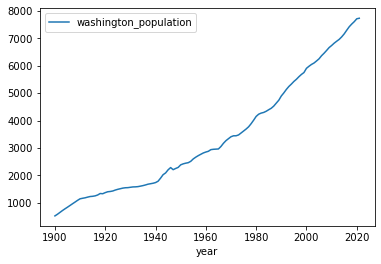

In [7]:
wa_20.plot.line(x="year", y="washington_population")